# Healthcare Dataset|📊 EDA

In [1]:
# Importing Libraries
# !pip install pandas-profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [4]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


# Demographic Analysis:
Demographic analysis typically involves studying various characteristics of a population group, such as age, gender, ethnicity, education level, and more. In the context of your dataset, which focuses on patient records, demographic analysis would primarily revolve around age and gender.


# Q.1 What is the distribution of patients by gender and age?

In [7]:
Gender_distribution=df['Gender'].value_counts()
Gender_distribution
Label=['Female','Male']

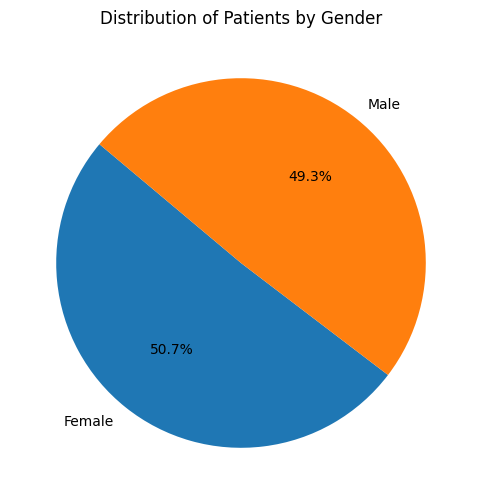

In [8]:
plt.figure(figsize=(8, 6))
plt.pie(Gender_distribution,labels=Label,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patients by Gender')
plt.show()

# Q.2 Which blood type is most common among the patients?

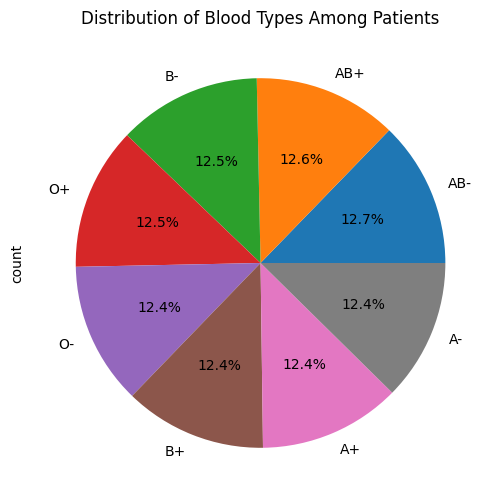

In [9]:
blood_type_counts = df['Blood Type'].value_counts()
plt.figure(figsize=(8, 6))
blood_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Blood Types Among Patients')
plt.show()


# Most_common_bloodType

In [10]:
most_common_blood_type = blood_type_counts.idxmax() #idxmax() is a pandas function used to find the index of the maximum value in a Series. When applied to a Series, 
# it returns the index label where the maximum value occurs.

print("Most common blood type among the patients:", most_common_blood_type)

Most common blood type among the patients: AB-


# Medical Condition Analysis:
Medical condition analysis involves examining the prevalence and characteristics of various medical conditions within a population.

# Q.1 What are the most prevalent medical conditions among the patients?


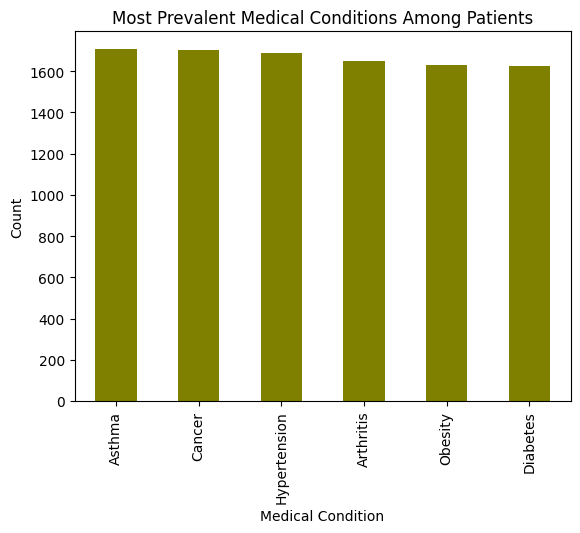

In [11]:
medical_condition_counts = df['Medical Condition'].value_counts()
medical_condition_counts.plot(kind='bar',color='olive',)
plt.title('Most Prevalent Medical Conditions Among Patients')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

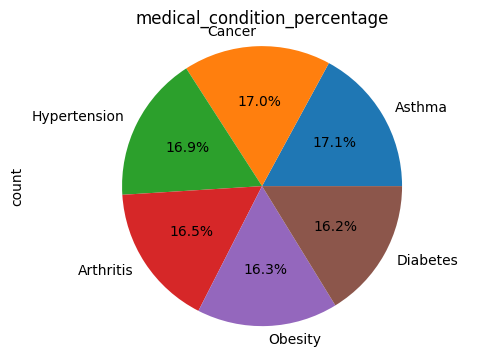

In [12]:
total_patients = len(df)
medical_condition_percentage = (medical_condition_counts / total_patients) * 100
medical_condition_percentage.value_counts()
plt.figure(figsize=(6, 4))
medical_condition_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('medical_condition_percentage')
plt.axis('equal') 
plt.show()


# Q.2 Is there any correlation between age and specific medical conditions? 

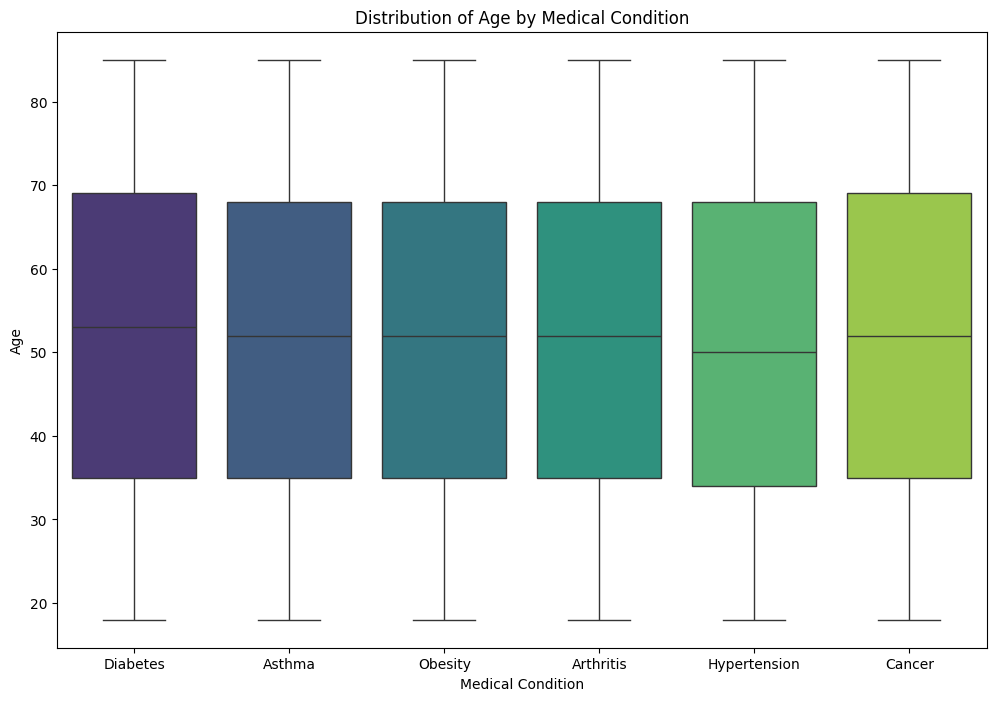

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Medical Condition', y='Age', data=df, palette='viridis')
plt.title('Distribution of Age by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.show()

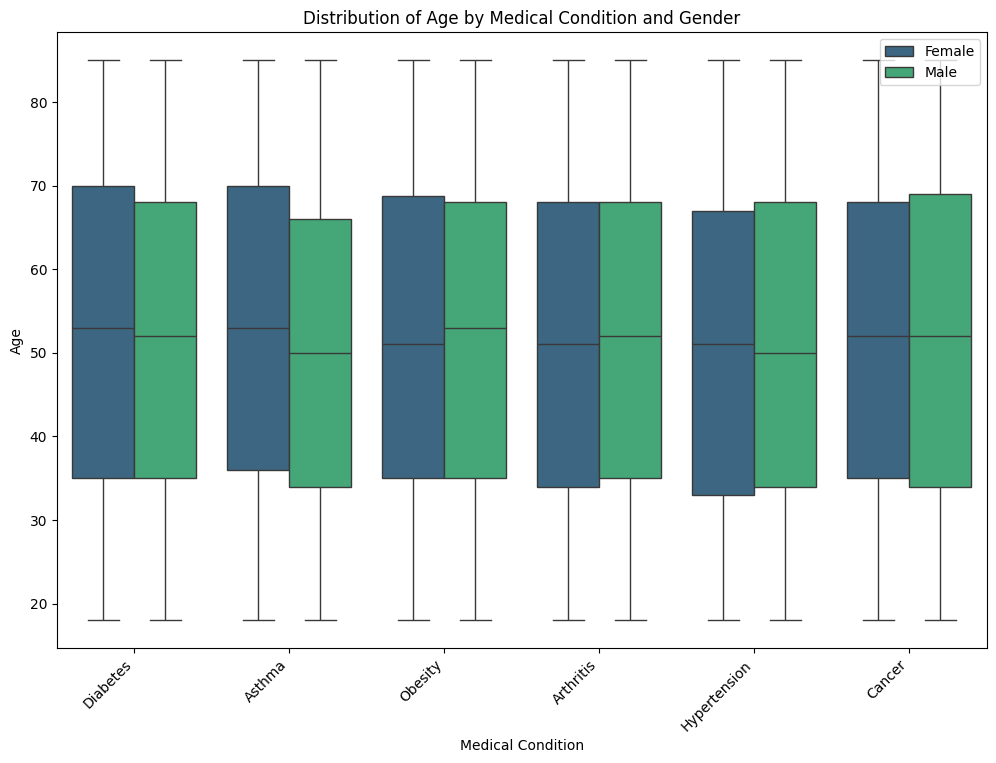

In [14]:
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='Medical Condition', y='Age', hue='Gender', data=df, palette='viridis')

# Set title and labels
plt.title('Distribution of Age by Medical Condition and Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Age')

# Adjust legend location
plt.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


# Admission Patterns:

# Q.1 What is the distribution of admission types (Emergency, Urgent, Elective)?

Distribution of Admission Types:
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


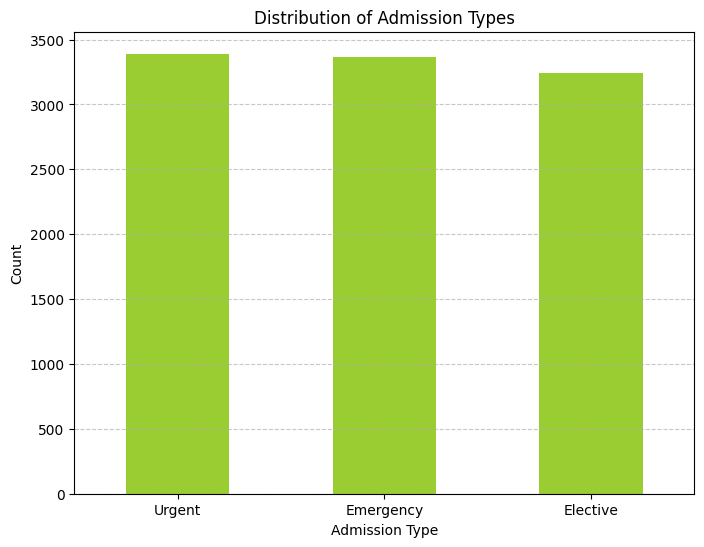

In [15]:

admission_type_counts = df['Admission Type'].value_counts()

print("Distribution of Admission Types:")
print(admission_type_counts)
plt.figure(figsize=(8, 6))
admission_type_counts.plot(kind='bar', color='yellowgreen')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Percentage Of Admission Tye Admission Type
Urgent       33.91
Emergency    33.67
Elective     32.42
Name: count, dtype: float64


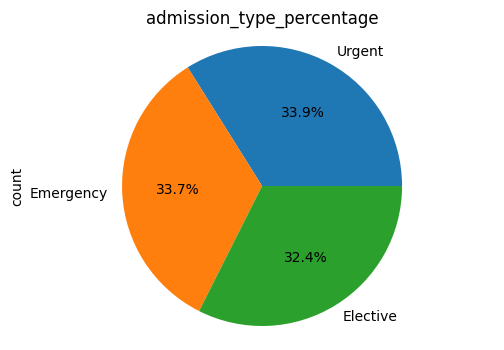

In [16]:
total_patients = len(df)
admission_type_percentage = (admission_type_counts / total_patients) * 100
print('Percentage Of Admission Tye',admission_type_percentage)
admission_type_percentage.value_counts()
plt.figure(figsize=(6, 4))
admission_type_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('admission_type_percentage')
plt.axis('equal') 
plt.show()

# Q.2 alyze the frequency of admissions over time to identify trends and patterns.

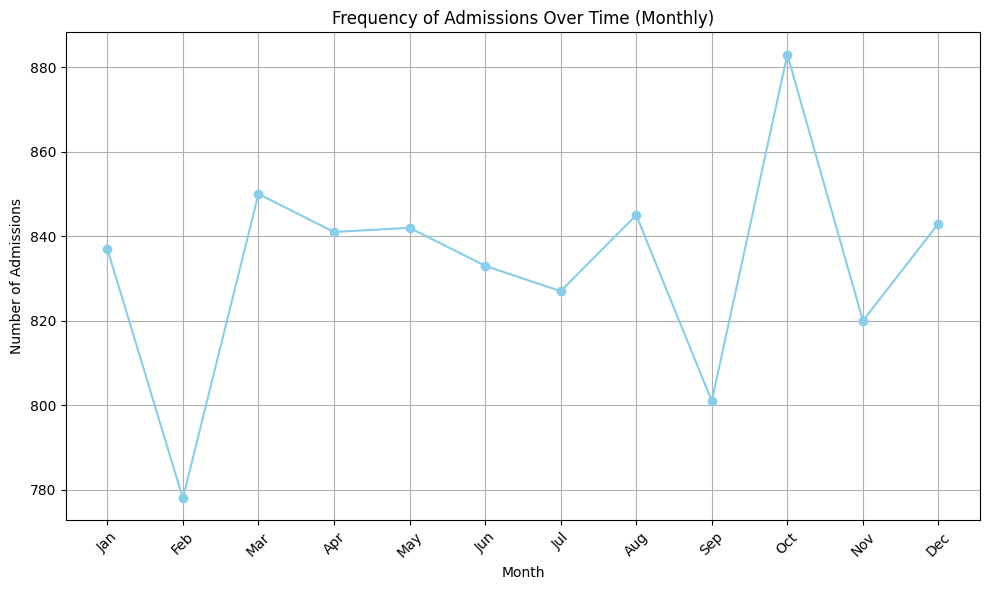

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df' with a column 'Date of Admission'

# Convert 'Date of Admission' column to datetime if it's not already
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Group admissions by month and count the number of admissions in each month
admissions_by_month = df.groupby(df['Date of Admission'].dt.month).size()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(admissions_by_month.index, admissions_by_month.values, marker='o', color='skyblue', linestyle='-')
plt.title('Frequency of Admissions Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Billing and Insurance Analysis:

# Q.1 What is the average billing amount for different insurance providers?

In [18]:
Avg_bill_amont=df.groupby('Insurance Provider')['Billing Amount'].mean()
print('average_billing_by_insurance_provider: ',Avg_bill_amont)

average_billing_by_insurance_provider:  Insurance Provider
Aetna               25837.923338
Blue Cross          25652.489617
Cigna               25656.946859
Medicare            25002.480429
UnitedHealthcare    25404.685388
Name: Billing Amount, dtype: float64


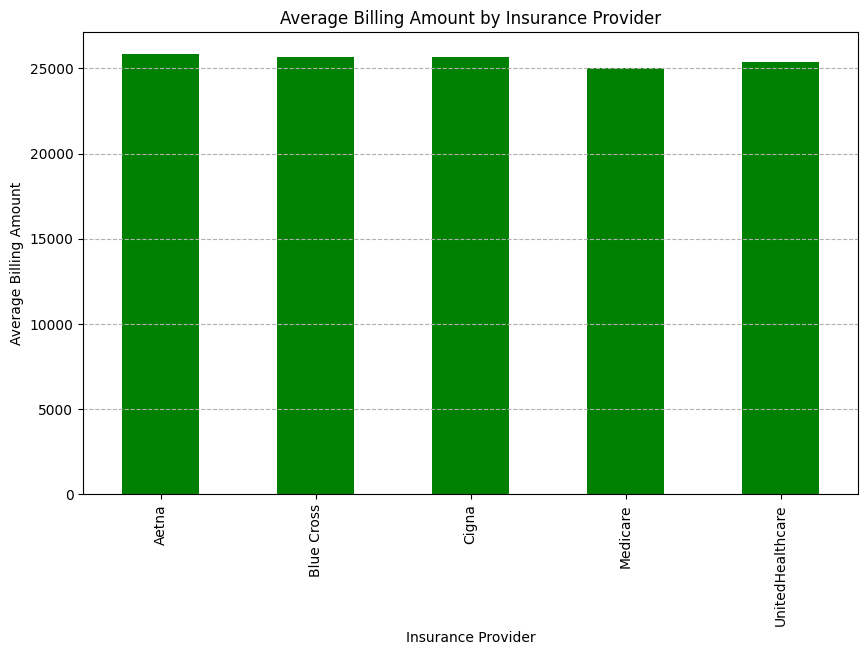

In [19]:
plt.figure(figsize=(10, 6))
Avg_bill_amont.plot(kind='bar',color='green')
plt.title('Average Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.grid(axis='y', linestyle='--')
plt.ylabel('Average Billing Amount')
plt.show()

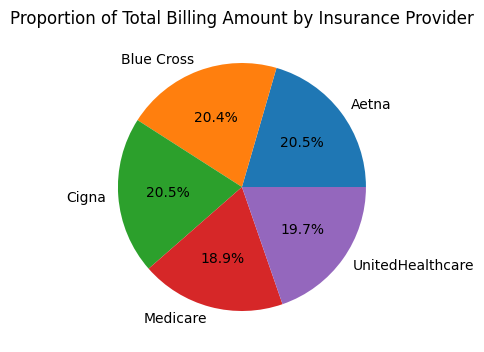

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Calculate the total billing amount for each insurance provider
total_billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].sum()

# Plot the pie chart
plt.figure(figsize=(4, 6))
plt.pie(total_billing_by_provider, labels=total_billing_by_provider.index, autopct='%1.1f%%')
plt.title('Proportion of Total Billing Amount by Insurance Provider')
plt.show()


# Q.2 Is there any correlation between medical conditions and billing amounts?

Correlation between medical conditions and billing amounts:
                Billing Amount
Billing Amount             1.0


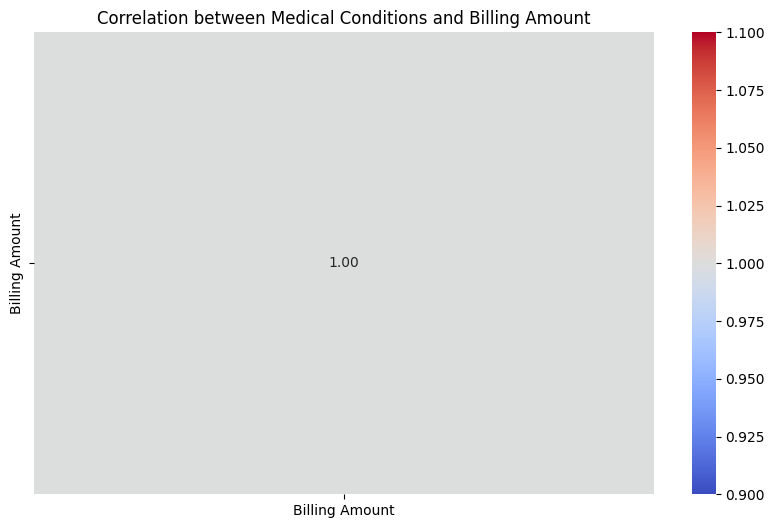

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'

# Select relevant columns for analysis
selected_columns = ['Medical Condition', 'Billing Amount']

# Exclude non-numeric columns if any
numeric_df = df[selected_columns].select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation coefficients
print("Correlation between medical conditions and billing amounts:")
print(correlation_matrix)

# Visualize correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Medical Conditions and Billing Amount')
plt.show()



# Medication and Test Results:

Medication and test results are essential aspects of healthcare data analysis, providing insights into the treatment and diagnostic outcomes for patients. Analyzing medication and test results can help healthcare professionals make informed decisions about patient care and treatment plans.

# Q.1 Which medications are most commonly prescribed to patients?

Top 10 most commonly prescribed medications:
Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64


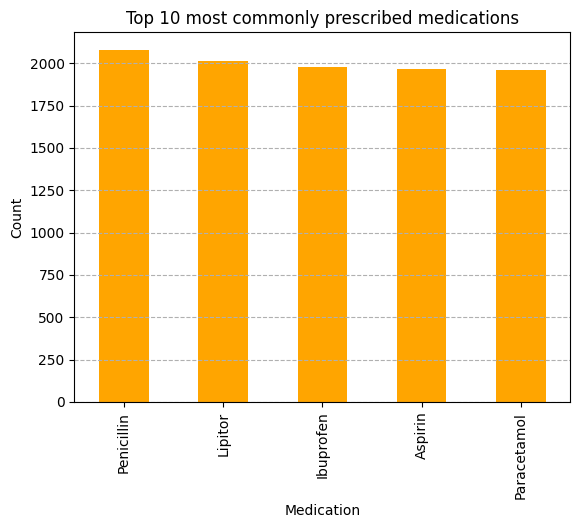

In [22]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df' with a column 'Medication'

# Count the frequency of each medication
medication_counts = df['Medication'].value_counts()

# Print the top 10 most commonly prescribed medications
top_medications = medication_counts.head(10)
print("Top 10 most commonly prescribed medications:")
print(top_medications)
top_medications.plot(kind='bar',color='orange')
plt.title('Top 10 most commonly prescribed medications')
plt.xlabel('Medication')
plt.grid(axis='y', linestyle='--')
plt.ylabel('Count')
plt.show()

# Q.2 Are there any patterns or trends in test results based on medical conditions?

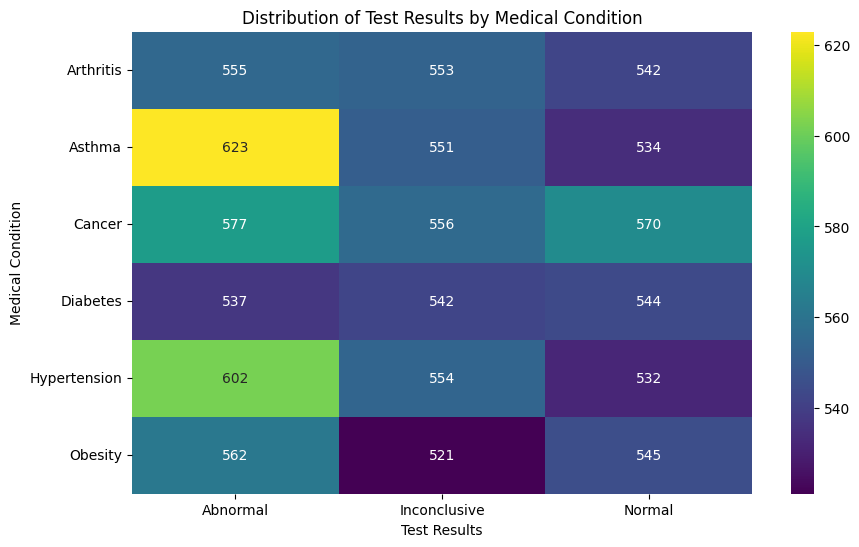

In [23]:
condition_test_counts = df.groupby(['Medical Condition', 'Test Results']).size().unstack()

# Plot a heatmap to visualize the distribution of test results across medical conditions
plt.figure(figsize=(10, 6))
sns.heatmap(condition_test_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Distribution of Test Results by Medical Condition')
plt.xlabel('Test Results')
plt.ylabel('Medical Condition')
plt.show()

# Hospital and Doctor Analysis:
Hospital and doctor analysis involves understanding the distribution of patients across different hospitals and identifying the doctors who treated the highest number of patients.

# Q.1 Which doctors treated the highest number of patients?

In [24]:
# Get the top 10 hospitals based on the number of patients admitted
top_10_hospitals = hospital_patient_counts.head(10).index

# Create an empty dictionary to store medical condition counts for each hospital
hospital_medical_conditions = {}

# Iterate over each hospital
for hospital in top_10_hospitals:
    # Filter the DataFrame by the current hospital
    hospital_df = df[df['Hospital'] == hospital]
    # Count the occurrences of medical conditions for the current hospital
    medical_condition_counts = hospital_df['Medical Condition'].value_counts()
    # Store the medical condition counts in the dictionary
    hospital_medical_conditions[hospital] = medical_condition_counts

# Print the medical condition counts for each hospital
for hospital, medical_conditions in hospital_medical_conditions.items():
    print(f"Medical conditions treated at {hospital}:")
    print(medical_conditions)


NameError: name 'hospital_patient_counts' is not defined

# Q.2 How many patients were admitted to each hospital?

In [ ]:
hospital_patient_counts = df['Hospital'].value_counts()
print("Number of patients admitted to each hospital:")
print(hospital_patient_counts)
